In [5]:
!pip3 install pickle5

In [9]:
import shap
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle5 as pickle
import os
import matplotlib.pyplot as plt

In [10]:
os.getcwd()

'/Users/amomenzadeh/OneDrive - mcw.edu/Ali_data'

In [11]:
with open(r'./pickles/renal_all.pkl', 'rb') as handle:
    i = pickle.load(handle)
with open(r'./pickles/renal_final_clf.pkl', 'rb') as handle:
    o = pickle.load(handle)
with open(r'./pickles/renal_phenbin_all_model_dict.pkl', 'rb') as tmpfile:
    model_dict = pickle.load(tmpfile)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(i, np.asarray(o), random_state=42, test_size=0.2)

In [13]:
xtrain.shape

(4486, 1821)

In [15]:
ytrain.shape

(4486,)

In [17]:
xtest.shape

(1122, 1821)

In [18]:
xtrain_means = shap.kmeans(np.asarray(xtrain), 100)

In [19]:
explainer = shap.TreeExplainer(model_dict['All']['RF'], 
                               data = np.asarray(xtrain), 
                               model_output="probability")
shap_values = explainer(np.asarray(xtest))

100%|===================| 2243/2244 [35:36<00:00]        

In [20]:
shap.initjs()

In [21]:
explainer.expected_value[0]

0.4829850144402543

In [25]:
shap_values.values[0:5,0:5,0].shape

(5, 5)

In [26]:
shap_values.values[:,:,0].shape

(1122, 1821)

In [27]:
# get probabilities so we can check that the sum of SHAP makes sense
y_probs = model_dict['All']['RF'].predict_proba(xtest)

In [28]:
y_probs[0]

array([0.63689416, 0.36310584])

In [29]:
shap_values.base_values

array([[0.48298501, 0.51701499],
       [0.48298501, 0.51701499],
       [0.48298501, 0.51701499],
       ...,
       [0.48298501, 0.51701499],
       [0.48298501, 0.51701499],
       [0.48298501, 0.51701499]])

In [30]:
shap_values.base_values[0][0]+shap_values.values[0,:,0].sum()

0.6368941738380876

In [31]:
shap_values.values[0,:,1].sum()

-0.15390915770507865

In [32]:
shap_values.base_values[0][1]+shap_values.values[0,:,1].sum()

0.36310582785464185

In [33]:
shap_values.values.shape

(1122, 1821, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

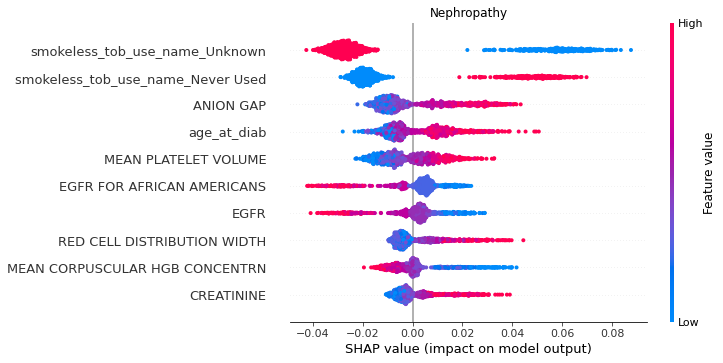

In [38]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, max_display=10,
                  features=xtest, show=False)
plt.title("Nephropathy")
plt.savefig(r'./figures/renal10-shap.svg', bbox_inches='tight',format='svg')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

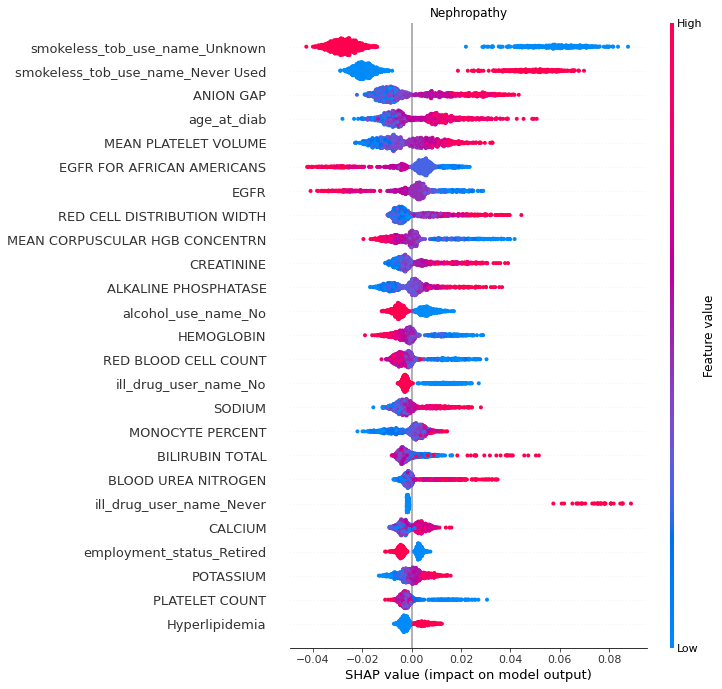

In [37]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, max_display=25,
                  features=xtest, show=False)
plt.title("Nephropathy")
plt.savefig(r'./figures/renal25-shap.svg', bbox_inches='tight',format='svg')
plt.show